# 불균형데이터의 예측 성능

## 사례 1. ROC < PR 곡선 (불균형자료)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

# Data Obtain

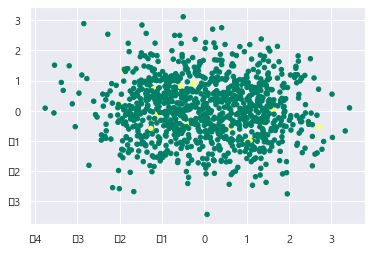

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01],
                          random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='summer')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2, stratify=y)

In [5]:
# summarize dataset
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Dataset: Class0=985, Class1=15
Train: Class0=492, Class1=8
Test: Class0=493, Class1=7


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
y_probas = clf.predict_proba(X_test)

target_names = ['Negative (0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Negative (0)       0.99      1.00      0.99       493
 Positive(1)       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

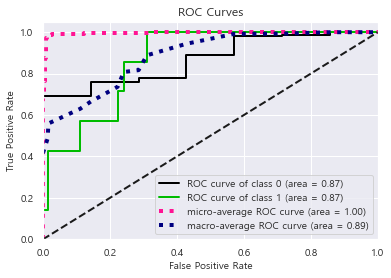

In [8]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

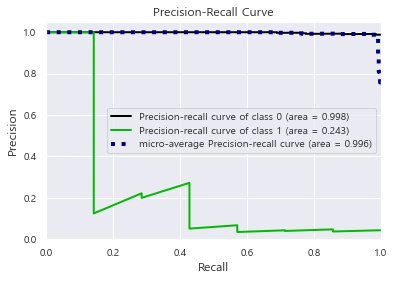

In [9]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

## ROC와 PR curve는 다른 이야기를 하고 있으며 불균형데이터의 예측 성능지표는 AUROC보다는 PR그래프가 우수하다.
### PR 그래프는 소수 범주 자료(양성, 1%)에 집중하는 반면 ROC curve는 음성과 양성 범주 자료를 모두 고려하기 때문이다.

If we use a threshold
of 0.5 and use the logistic regression model to make a prediction for all examples in the test
set, we see that it predicts class 0 or the majority class in all cases. This can be confirmed by
using the fit model to predict crisp class labels that will use the default threshold of 0.5. The
distribution of predicted class labels can then be summarized.

### 사이킷런 내부 모델의 의사결정임계값은 '0.5'로 예측 모델의 결과인 500개는 모두 음성으로 판정한 것을 확인할 수있으며 양성판정 비율은 모두 0.22 이하인 것으로 나타남

In [10]:
np.sort(y_probas[:, 1].round(2))

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [11]:
from collections import Counter
# summarize the distribution of class labels
print(Counter(y_pred))

Counter({0: 500})


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

Text(0.5, 1.0, '양성판정확률의 분포')

Text(0.5, 0, '양성판정확률')

0.22388081727919118

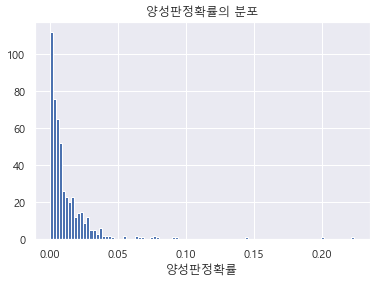

In [12]:
import matplotlib.pyplot as pyplot
y_scores = y_probas[:, 1]
pd.DataFrame(y_scores).hist(bins=100)
pyplot.title('양성판정확률의 분포')
pyplot.xlabel('양성판정확률')
np.max(y_scores)

In [13]:
data = pd.DataFrame(y_scores, columns=['y_predict'])
data

,y_predict
0,0.042028
1,0.001389
2,0.006842
3,0.028677
4,0.000467
...,...
495,0.011425
496,0.036711
497,0.002462
498,0.014941


## How to Calibrate Probabilities

In [14]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=3)
calibrated_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv=3)

In [15]:
calibrated_clf.predict_proba(X_train)[:5, :]

array([[0.98019388, 0.01980612],
       [0.98108605, 0.01891395],
       [0.98378488, 0.01621512],
       [0.98355421, 0.01644579],
       [0.98057176, 0.01942824]])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

Text(0.5, 1.0, '양성판정확률의 분포')

Text(0.5, 0, '양성판정확률')

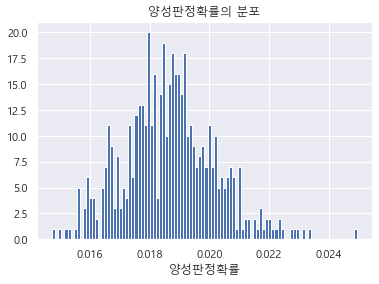

In [16]:
yhat = calibrated_clf.predict_proba(X_test)
model_probs = yhat[:, 1]
pd.DataFrame(model_probs).hist(bins=100)
pyplot.title('양성판정확률의 분포')
pyplot.xlabel('양성판정확률')

array([[<AxesSubplot:title={'center':'y_predict'}>,
        <AxesSubplot:title={'center':'y_predict_calibrated'}>]],
      dtype=object)

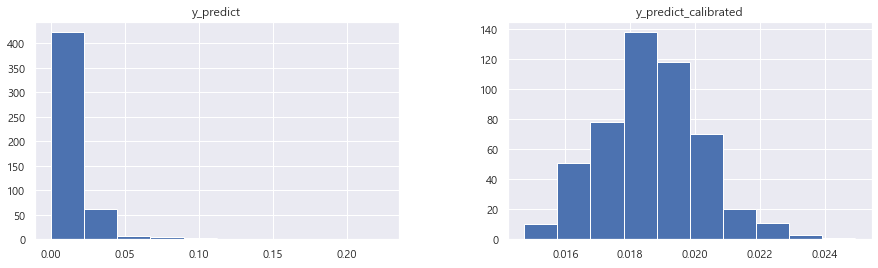

In [17]:
data['y_predict_calibrated'] = yhat[:, 1]
data.hist(figsize=(15,4))

In [18]:
data.head()

,y_predict,y_predict_calibrated
0,0.042028,0.017638
1,0.001389,0.017361
2,0.006842,0.017920
3,0.028677,0.017331
4,0.000467,0.020988


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='y_predict'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='y_predict_calibrated'>

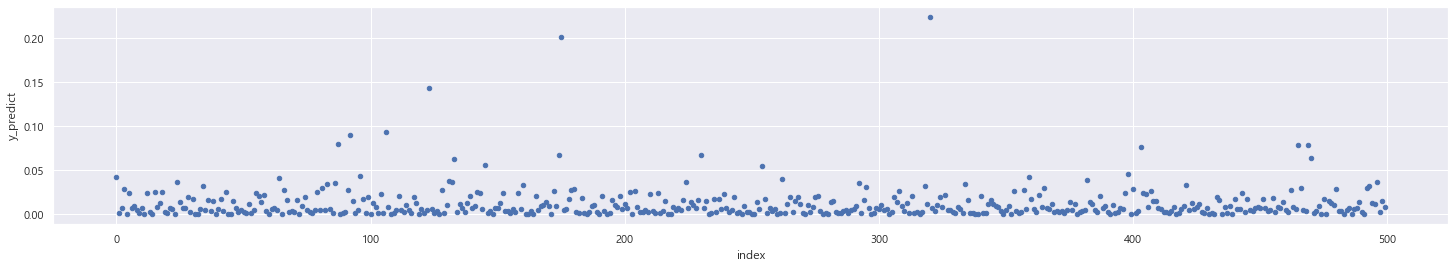

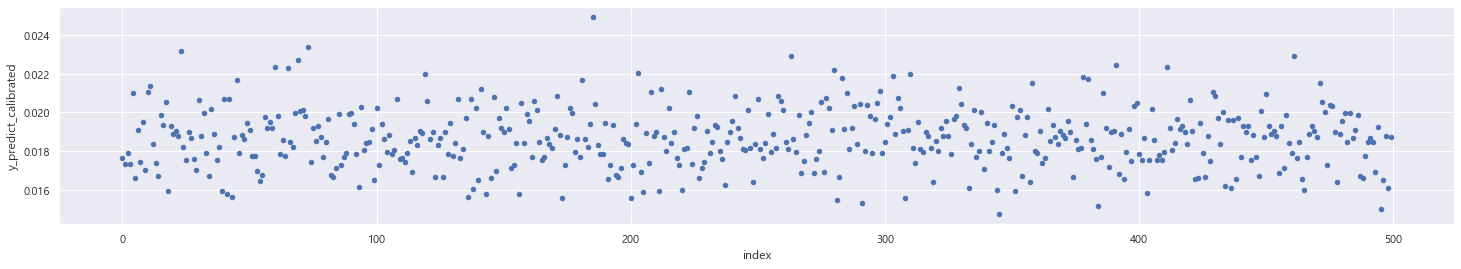

In [19]:
import warnings
warnings.filterwarnings(action='ignore') 
data.reset_index().plot.scatter(x='index', y = 'y_predict', figsize=(25,4))
data.reset_index().plot.scatter(x='index', y = 'y_predict_calibrated', figsize=(25,4))

https://scikit-learn.org/stable/modules/calibration.html#calibration

A histogram plot of the predicted probabilities for class 1 is also created, showing the center of mass (most predicted probabilities) is less than 0.5 and in fact is generally close to zero.

## 사례 2. PR > ROC (불균형자료)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 1024)
y_predict = model.fit(X_train, y_train).predict(X_test)
y_scores = model.fit(X_train, y_train).decision_function(X_test)

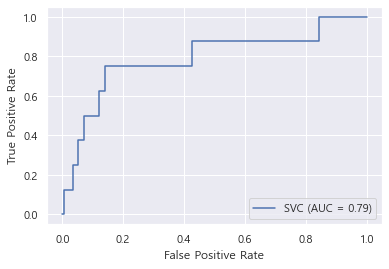

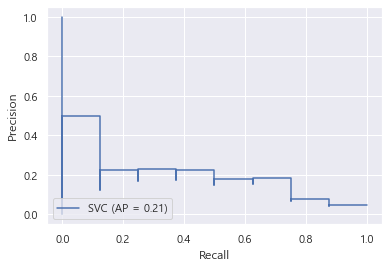

In [21]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
svc_disp = plot_roc_curve(model, X_test, y_test); plt.show()
svc_disp = plot_precision_recall_curve(model, X_test, y_test)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       0.00      0.00      0.00         8

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.92      0.96      0.94       200



# Imbalanced_classification_with_python(Jason brown)
## Probability Threshold Moving
## 1.  Optimal Threshold for ROC Curve

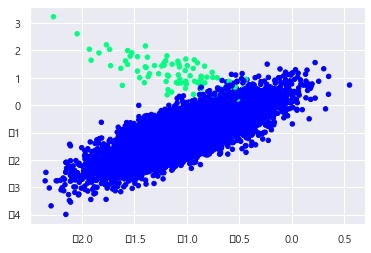

In [23]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')

In [24]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)

LogisticRegression()

The Geometric Mean or G-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and
the specificity. One approach would be to test the model with each threshold returned from the call roc auc score() and select the threshold with the largest G-mean value.

In [25]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.016153, G-mean=0.933


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

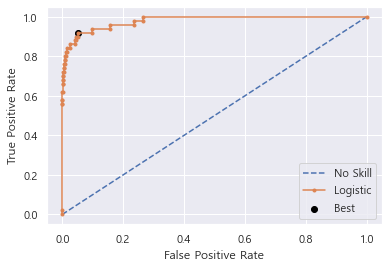

In [26]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

It turns out there is a much faster way to get the same result, called the Youden’s J statistic. The statistic is calculated as:
### J = Sensitivity + Specificity − 1 = Sensitivity + (1 − FalsePositiveRate) − 1 =  TruePositiveRate − FalsePositiveRate

In [27]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.016153


## 2. Optimal Threshold for Precision-Recall Curve
### 2. 1 Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive (minority class) only.

Best Threshold=0.256036, F-measure=0.756


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

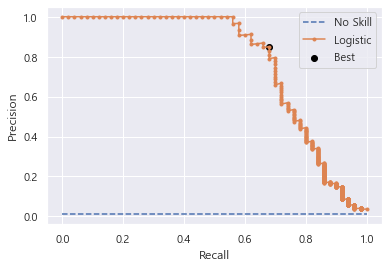

In [28]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(testy, yhat)

# convert to f-measure
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f-measure
ix = np.argmax(fscore)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

### 2.2. Optimal Threshold Tuning
Sometimes, we simply have a model and we wish to know the best threshold directly. In this case, we can define a set of thresholds and then evaluate predicted probabilities under each in order to find and select the optimal threshold.

In [29]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [30]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# evaluate each threshold
from sklearn.metrics import f1_score
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

LogisticRegression()

Threshold=0.251, F-measure=0.75556


## 4. 성과지표 요약

In [31]:
p, r, thresholds = precision_recall_curve(testy, probs)
pd.DataFrame(np.vstack([p, r]), index=['정밀도', '재현율']).round(2)
pd.DataFrame(thresholds,columns=['분류임계값']).T.round(2)

,0,1,2,3,4,5,6,7,8,9,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
정밀도,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0
재현율,1.00,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,0.18,0.16,0.14,0.12,0.1,0.08,0.06,0.04,0.02,0.0


,0,1,2,3,4,5,6,7,8,9,...,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362
분류임계값,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.97,0.98,0.99,0.99,1.0,1.0,1.0,1.0,1.0,1.0


### 분류임계값에 따라 Positive 판정율 내리는 비율
- 재현율과 정밀도가 교차하는 지점이 오른쪽에 있을 수록 better estimator

In [32]:
scores = [np.sum(to_labels(probs, t))/len(probs) for t in thresholds]

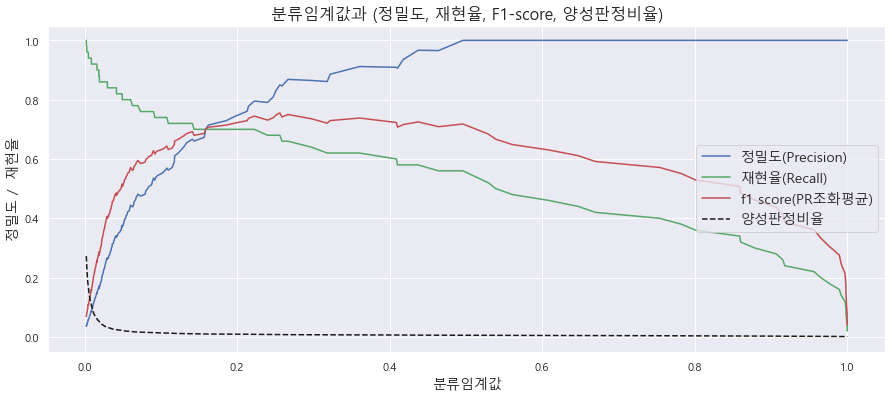

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(p, r, thresholds)

## 다양한 metrics로 Tuning

In [34]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')

In [36]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring = 'accuracy')
y_predict = grid.fit(trainX, trainy).predict(testX)
print(classification_report(testy, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.92      0.66      0.77        50

    accuracy                           1.00      5000
   macro avg       0.96      0.83      0.88      5000
weighted avg       1.00      1.00      1.00      5000



In [37]:
grid = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring = 'recall')
y_predict = grid.fit(trainX, trainy).predict(testX)
print(classification_report(testy, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.92      0.66      0.77        50

    accuracy                           1.00      5000
   macro avg       0.96      0.83      0.88      5000
weighted avg       1.00      1.00      1.00      5000



In [38]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring = 'precision')
y_predict = grid.fit(trainX, trainy).predict(testX)
print(classification_report(testy, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4950
           1       1.00      0.22      0.36        50

    accuracy                           0.99      5000
   macro avg       1.00      0.61      0.68      5000
weighted avg       0.99      0.99      0.99      5000



In [39]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring = 'f1')
y_predict = grid.fit(trainX, trainy).predict(testX)
print(classification_report(testy, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.91      0.64      0.75        50

    accuracy                           1.00      5000
   macro avg       0.96      0.82      0.88      5000
weighted avg       1.00      1.00      1.00      5000



In [40]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=3)

params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring = ftwo_scorer)
y_predict = grid.fit(trainX, trainy).predict(testX)
print(classification_report(testy, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.92      0.66      0.77        50

    accuracy                           1.00      5000
   macro avg       0.96      0.83      0.88      5000
weighted avg       1.00      1.00      1.00      5000



# END